## Gender Classification

**Dpendencies**

In [1]:
# importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as Imgen
from keras.models import Model,Sequential
from keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Flatten,Dense,GlobalAveragePooling2D,BatchNormalization
from keras.callbacks import EarlyStopping,ModelCheckpoint

from sklearn.metrics import confusion_matrix,classification_report

**Data generation**

In [2]:
traingen = Imgen(rescale=1./255,
                shear_range = 0.2,
                zoom_range = 0.2,
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                fill_mode="nearest",
                validation_split=0.15)


testgen = Imgen(rescale=1./255)


In [20]:
trainds = traingen.flow_from_directory("archive/Training",
                                      target_size=(96,96),
                                       seed=123,
                                       batch_size=32,
                                       subset="training"
                                      )
valds = traingen.flow_from_directory("archive/Validation",
                                      target_size=(96,96),
                                       seed=123,
                                       batch_size=32,
                                       subset="validation"
                                      )


Found 39959 images belonging to 2 classes.
Found 1747 images belonging to 2 classes.


In [21]:
c = trainds.class_indices
classes = list(c.keys())
classes

['female', 'male']

## **ANN MODEL** 


In [23]:
image_input = Input(shape=(96,96,3))

x = Flatten()(image_input)

x = Dense(256,activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

image_output = Dense(2,activation="softmax")(x)

ann_model = Model(image_input,image_output)

In [24]:
ann_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 27648)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               7078144   
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 7,079,682
Trainable params: 7,079,170
Non-trainable params: 512
_______________________________________________

In [26]:
ann_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [27]:
import tensorflow as tf

with tf.device('GPU:0'):
    hist = ann_model.fit(trainds,epochs=22,validation_data=valds)

Epoch 1/22
1249/1249 [==============================] - 909s 725ms/step - loss: 0.6478 - accuracy: 0.6638 - val_loss: 0.5810 - val_accuracy: 0.6966
Epoch 2/22
1249/1249 [==============================] - 314s 251ms/step - loss: 0.5772 - accuracy: 0.7071 - val_loss: 0.6030 - val_accuracy: 0.6732
Epoch 3/22
1249/1249 [==============================] - 310s 248ms/step - loss: 0.5937 - accuracy: 0.6930 - val_loss: 0.5916 - val_accuracy: 0.6680
Epoch 4/22
1249/1249 [==============================] - 183s 146ms/step - loss: 0.5945 - accuracy: 0.6907 - val_loss: 0.6150 - val_accuracy: 0.6760
Epoch 5/22
1249/1249 [==============================] - 144s 115ms/step - loss: 0.6265 - accuracy: 0.6253 - val_loss: 0.5627 - val_accuracy: 0.7338
Epoch 6/22
1249/1249 [==============================] - 155s 124ms/step - loss: 0.6030 - accuracy: 0.6582 - val_loss: 0.5823 - val_accuracy: 0.6800
Epoch 7/22
1249/1249 [==============================] - 146s 117ms/step - loss: 0.6106 - accuracy: 0.6458 - val_

## **CNN MODEL**

In [28]:
x = Conv2D(32,(3,3),activation = "relu")(image_input)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64,(3,3),activation = "relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = Conv2D(128,(3,3),activation = "relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = Flatten()(x)

x = Dense(256,activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

image_output = Dense(2,activation="softmax")(x)

cnn_model = Model(image_input,image_output)

In [29]:
cnn_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 94, 94, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 94, 94, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 45, 45, 64)        256 

In [30]:
cnn_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

**Training**

In [32]:
import tensorflow as tf

with tf.device('GPU:0'):
    hist_cnn = cnn_model.fit(trainds,epochs=22,validation_data=valds)

Epoch 1/22
1249/1249 [==============================] - 194s 153ms/step - loss: 0.5721 - accuracy: 0.7567 - val_loss: 0.4932 - val_accuracy: 0.7607
Epoch 2/22
1249/1249 [==============================] - 249s 199ms/step - loss: 0.2488 - accuracy: 0.9017 - val_loss: 0.2531 - val_accuracy: 0.8970
Epoch 3/22
1249/1249 [==============================] - 306s 245ms/step - loss: 0.2099 - accuracy: 0.9161 - val_loss: 0.2443 - val_accuracy: 0.9096
Epoch 4/22
1249/1249 [==============================] - 311s 249ms/step - loss: 0.1900 - accuracy: 0.9264 - val_loss: 0.3598 - val_accuracy: 0.8340
Epoch 5/22
1249/1249 [==============================] - 308s 246ms/step - loss: 0.1801 - accuracy: 0.9307 - val_loss: 0.1782 - val_accuracy: 0.9347
Epoch 6/22
1249/1249 [==============================] - 305s 244ms/step - loss: 0.1675 - accuracy: 0.9374 - val_loss: 0.1728 - val_accuracy: 0.9422
Epoch 7/22
1249/1249 [==============================] - 311s 249ms/step - loss: 0.1646 - accuracy: 0.9381 - val_

## **CNN PLOTTING**

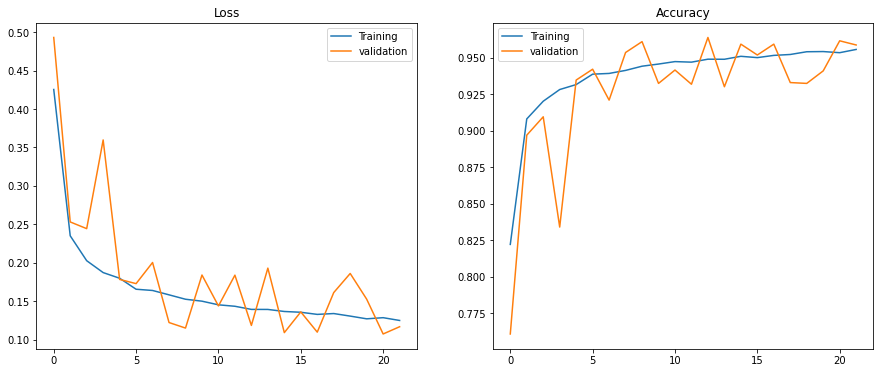

In [43]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,2)
plt.plot(hist_cnn.epoch,hist_cnn.history['accuracy'],label = 'Training')
plt.plot(hist_cnn.epoch,hist_cnn.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2, 1)
plt.plot(hist_cnn.epoch,hist_cnn.history['loss'],label = 'Training')
plt.plot(hist_cnn.epoch,hist_cnn.history['val_loss'],label = 'validation')


plt.title("Loss")
plt.legend()
plt.show()

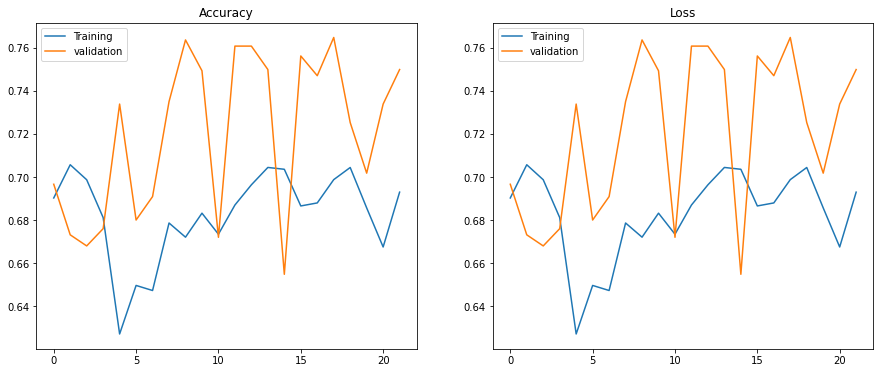

In [49]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()